In [16]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("timeseries").getOrCreate()

In [17]:
df = spark.read.csv("mock_data_unique.csv", header=True, inferSchema=True).select("updated_time")
df.show()

+-------------------+
|       updated_time|
+-------------------+
|2023-11-30 02:51:57|
|2024-05-06 02:51:57|
|2024-05-11 02:51:57|
|2024-04-21 02:51:57|
|2023-09-10 02:51:57|
|2023-10-30 02:51:57|
|2024-05-03 02:51:57|
|2023-06-17 02:51:57|
|2023-06-27 02:51:57|
|2023-08-21 02:51:57|
|2024-03-30 02:51:57|
|2023-07-07 02:51:57|
|2024-01-15 02:51:57|
|2023-08-07 02:51:57|
|2024-03-13 02:51:57|
|2023-07-10 02:51:57|
|2024-06-08 02:51:57|
|2023-07-09 02:51:57|
|2024-04-27 02:51:57|
|2024-05-25 02:51:57|
+-------------------+
only showing top 20 rows



In [18]:
from pyspark.sql.functions import split

df = df.withColumn('date', split(df['updated_time'], ' ')[0])
df = df.withColumn('time', split(df['updated_time'], ' ')[1])
df = df.groupBy('date').count().orderBy('date', ascending=True)

In [19]:
df.show()

+----------+-----+
|      date|count|
+----------+-----+
|2023-06-16| 2756|
|2023-06-17| 2742|
|2023-06-18| 2783|
|2023-06-19| 2691|
|2023-06-20| 2796|
|2023-06-21| 2745|
|2023-06-22| 2727|
|2023-06-23| 2686|
|2023-06-24| 2763|
|2023-06-25| 2762|
|2023-06-26| 2734|
|2023-06-27| 2788|
|2023-06-28| 2787|
|2023-06-29| 2740|
|2023-06-30| 2775|
|2023-07-01| 2679|
|2023-07-02| 2806|
|2023-07-03| 2743|
|2023-07-04| 2779|
|2023-07-05| 2834|
+----------+-----+
only showing top 20 rows



In [21]:
df.printSchema()

root
 |-- date: string (nullable = true)
 |-- count: long (nullable = false)



In [22]:
from pyspark.sql.functions import col
from pyspark.sql.types import DateType

df = df.withColumn("date", col("date").cast(DateType()))
df.printSchema()

root
 |-- date: date (nullable = true)
 |-- count: long (nullable = false)



In [23]:
df.show()

+----------+-----+
|      date|count|
+----------+-----+
|2023-06-16| 2756|
|2023-06-17| 2742|
|2023-06-18| 2783|
|2023-06-19| 2691|
|2023-06-20| 2796|
|2023-06-21| 2745|
|2023-06-22| 2727|
|2023-06-23| 2686|
|2023-06-24| 2763|
|2023-06-25| 2762|
|2023-06-26| 2734|
|2023-06-27| 2788|
|2023-06-28| 2787|
|2023-06-29| 2740|
|2023-06-30| 2775|
|2023-07-01| 2679|
|2023-07-02| 2806|
|2023-07-03| 2743|
|2023-07-04| 2779|
|2023-07-05| 2834|
+----------+-----+
only showing top 20 rows



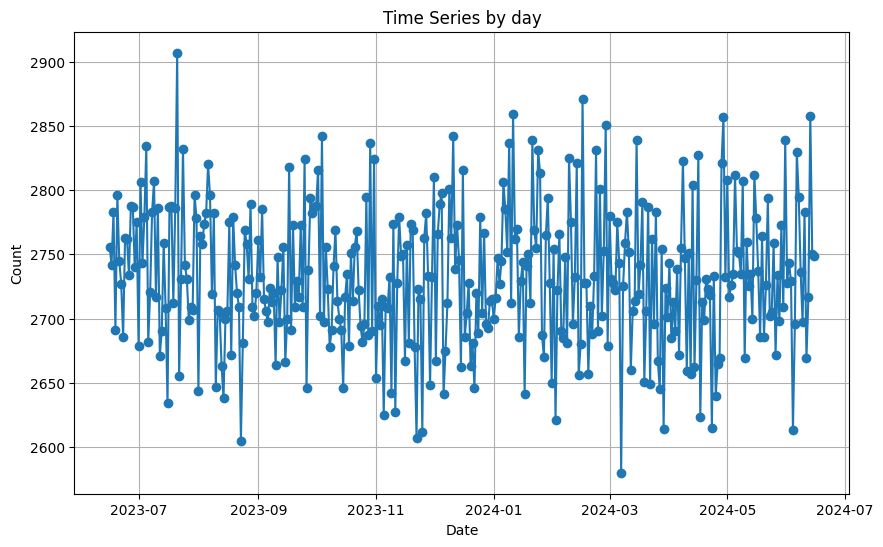

In [26]:
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas DataFrame for plotting
pandas_df = df.toPandas()

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(pandas_df['date'], pandas_df['count'], marker='o')
plt.title('Time Series by day')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.show()

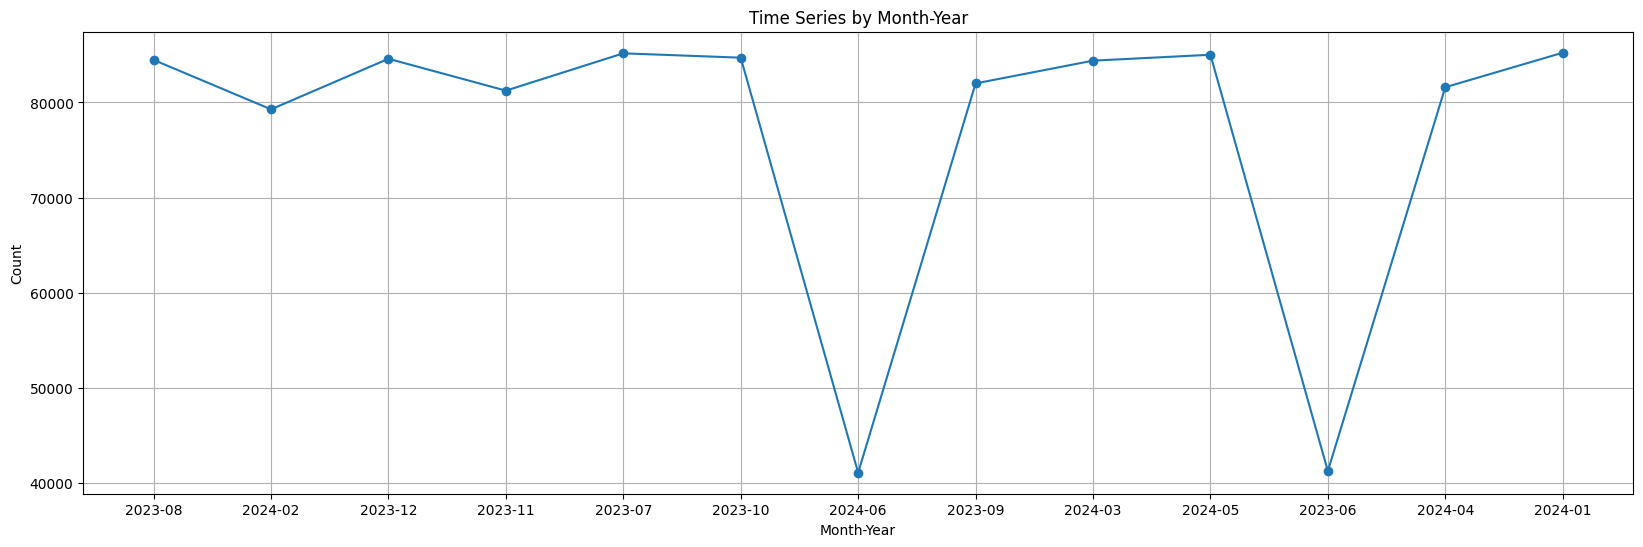

In [28]:
from pyspark.sql.functions import date_format

df = df.withColumn('month_year', date_format(df['date'], 'yyyy-MM'))
df_monthly = df.groupBy('month_year').sum('count')

# Convert Spark DataFrame to Pandas DataFrame for plotting
pandas_df_monthly = df_monthly.toPandas()

# Create a line graph
plt.figure(figsize=(20, 6))
plt.plot(pandas_df_monthly['month_year'], pandas_df_monthly['sum(count)'], marker='o')
plt.title('Time Series by Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()